# Plan
---

1. [x] ~~Pick small random dataset~~
2. [x] ~~Perform Principle Component Analysis~~
7. [x] ~~Choose proper dataset~~
3. [x] ~~Choose Classfication Model~~
4. [x] ~~Divide into test and training dataset~~
5. [x] ~~Calculate performance measures~~
6. [x] ~~Start writing report~~
8. [x] ~~Finish report {Add Plots}~~

---

In [ ]:
%autosave 5

Autosaving every 5 seconds


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#@title Libraries used for the project

In [ ]:
# For Raghav
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart_failure_clinical_records_dataset.csv")
print(df)

In [ ]:
# For others
from google.colab import files
files.upload()

Saving zoo.csv to zoo.csv


{'zoo.csv': b'aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1\nantelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1\nbass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4\nbear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1\nboar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1\nbuffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1\ncalf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1\ncarp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4\ncatfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4\ncavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1\ncheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1\nchicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2\nchub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4\nclam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7\ncrab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7\ncrayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7\ncrow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2\ndeer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1\ndogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4\ndolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1\ndove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2\nduck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2\nelephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1\nflamingo,0,1,1,0,1,0,0,0,1,1,0,0

In [ ]:
df = pd.read_csv("zoo.csv", header = None)
print(df)

#@title Reading data

           0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  \
0    aardvark   1   0   0   1   0   0   1   1   1   1   0   0   4   0   0   1   
1    antelope   1   0   0   1   0   0   0   1   1   1   0   0   4   1   0   1   
2        bass   0   0   1   0   0   1   1   1   1   0   0   1   0   1   0   0   
3        bear   1   0   0   1   0   0   1   1   1   1   0   0   4   0   0   1   
4        boar   1   0   0   1   0   0   1   1   1   1   0   0   4   1   0   1   
..        ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
96    wallaby   1   0   0   1   0   0   0   1   1   1   0   0   2   1   0   1   
97       wasp   1   0   1   0   1   0   0   0   0   1   1   0   6   0   0   0   
98       wolf   1   0   0   1   0   0   1   1   1   1   0   0   4   1   0   1   
99       worm   0   0   1   0   0   0   0   0   0   1   0   0   0   0   0   0   
100      wren   0   1   1   0   1   0   0   0   1   1   0   0   2   1   0   0   

     17  
0     1  
1     1

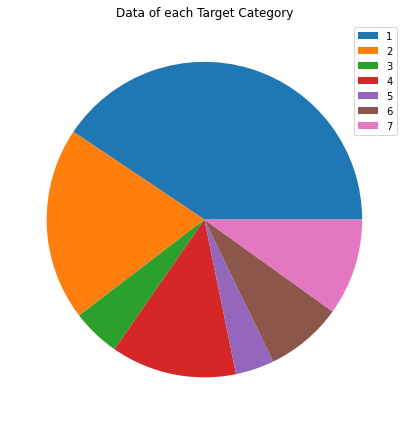

In [ ]:
#@title Pie chart for target categories (1,2,3,4,5,6,7)
count = [0,0,0,0,0,0,0]

for val in df[17]:
  count[val-1]+=1

plt.rcParams["figure.figsize"] = [8,6]
plt.rcParams["figure.autolayout"] = True

labels = ['1','2','3','4','5','6','7']
ax = plt.subplot()
ax.pie(count)
plt.title("Data of each Target Category")
plt.legend(labels, loc="best")

plt.show()

In [ ]:

# Seperate out the properties
properties = np.array(df.columns[1:len(df.columns)-1])

# Seperate out the target
target = df.columns[len(df.columns)-1]

# Extract property values
prop_vals = df.loc[:,properties].values

# Extract target values
tar_vals = df.loc[:,[target]].values

# Standardise property values (Mean: 0 and Variance: 1)
stand_prop_vals = StandardScaler().fit_transform(prop_vals)

#@title Standardising and Separating the Target

In [ ]:
# pca with 90% variance retention
pca = PCA(n_components=0.90, svd_solver='full')

# join table
principalComponents = pca.fit_transform(stand_prop_vals)

print(len(principalComponents[0]))
print(principalComponents)

#@title Preliminary Analysis using PCA

In [ ]:

# how much each principal component is contributing
print(pca.explained_variance_ratio_)

# total sum of contributions, greater than or equal to min variance)
print(np.sum(np.array(pca.explained_variance_ratio_)))

# @title Inferences from PCA

[0.29191091 0.20882904 0.14778223 0.07693359 0.05962114 0.04662709
 0.03517581 0.03202669 0.02798703]
0.926893528467885


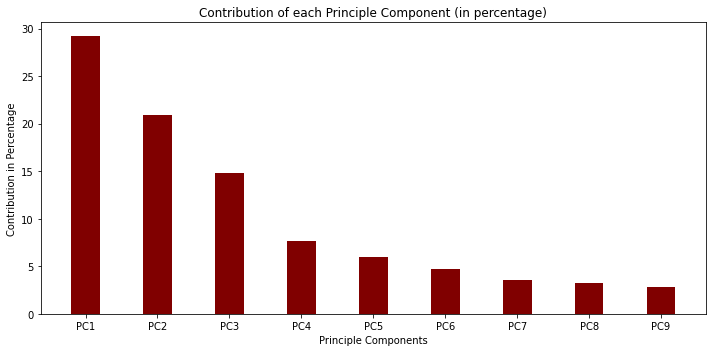

In [ ]:
properties = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

bar_fig = plt.figure(figsize = (10, 5))
plt.bar(properties, pca.explained_variance_ratio_ * 100, color ='maroon', width = 0.4)

plt.xlabel("Principle Components")
plt.ylabel("Contribution in Percentage")
plt.title("Contribution of each Principle Component (in percentage)")

plt.show()

#@title Bar graph of contribution of each principle component

In [ ]:

principalDf = pd.DataFrame(data = principalComponents ,columns = ['principal component 1', 'principal component 2', 'principal component 3', 
                                                                  'principal component 4', 'principal component 5', 'principal component 6', 
                                                                  'principal component 7', 'principal component 8', 'principal component 9'])
finalDf = pd.concat([principalDf, df[[target]]], axis=1)
print(finalDf)

#@title Earlier dataset (17 attributes) is now converted into a final dataset (9 attributes) on which models will be trained and tested

     principal component 1  principal component 2  principal component 3  \
0                -2.535256              -0.260278               1.241842   
1                -2.877354              -0.401547              -0.100018   
2                 1.761003               3.705592              -0.180105   
3                -2.535256              -0.260278               1.241842   
4                -2.818975               0.107081               0.136852   
..                     ...                    ...                    ...   
96               -2.764120              -0.065219              -0.409317   
97                1.667523              -3.219581               2.723445   
98               -2.818975               0.107081               0.136852   
99                2.018815              -1.257793               1.409204   
100               2.049971              -1.907380              -2.497322   

     principal component 4  principal component 5  principal component 6  \
0          

In [ ]:
test_set = [2, 4, 13, 32, 33, 55, 56, 65, 89, 92, 96, 97, 98]

#@title Deciding the test set

In [ ]:
test_set = [2,4,96,97,98,65,89,13,55,32,33,56,92] #Bayes False, KNN True
# test_set = [2,4,96,97,98,65,52,89,13,55,32,51,90] #Gives False, 52 is the outlier
# test_set = [2,4,96,97,98] #Gives True
# test_set = [89] #Bayes False, KNN True
# test_set = [89, 52]

In [ ]:

PC1 = []
PC2 = []
PC3 = []
PC4 = []
PC5 = []
PC6 = []
PC7 = []
PC8 = []
PC9 = []
training_tar_vals = []
test_df = []
test_tar_vals = []

# Creation of training set
i=0
for point in principalComponents:
  if i not in test_set : 
    PC1.append(point[0])
    PC2.append(point[1])
    PC3.append(point[2])
    PC4.append(point[3])
    PC5.append(point[4])
    PC6.append(point[5])
    PC7.append(point[6])
    PC8.append(point[7])
    PC9.append(point[8])
  i += 1

i = 0
for val in tar_vals:
  if i not in test_set :
    training_tar_vals.append(val)
  i += 1

# Creation of test set
for i in test_set:
  test_df.append(principalDf.iloc[i])
  test_tar_vals.append(tar_vals[i])

combineC = list(zip(PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9))

#@title Dividing final dataset on the basis of test set and training set

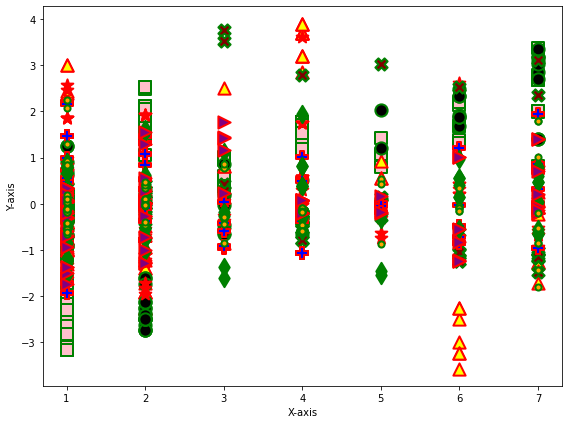

In [ ]:
# @title Raghav's Meaningless Graph 
# PCi (X) vs training_tar_vals (Y)
#Scatterplot (9 subplots with different color in one plot)

# NOW REDUNDANT

plt.scatter(training_tar_vals, PC1, c ="pink", linewidths = 2, marker ="s", edgecolor ="green", s = 150)
 
plt.scatter(training_tar_vals, PC2, c ="yellow", linewidths = 2, marker ="^", edgecolor ="red", s = 150)

plt.scatter(training_tar_vals, PC3, c ="black", linewidths = 2, marker ="o", edgecolor ="green", s = 150)
 
plt.scatter(training_tar_vals, PC4, c ="red", linewidths = 2, marker ="*", edgecolor ="red", s = 150)

plt.scatter(training_tar_vals, PC5, c ="maroon", linewidths = 2, marker ="X", edgecolor ="green", s = 150)
 
plt.scatter(training_tar_vals, PC6, c ="blue", linewidths = 2, marker ="P", edgecolor ="red", s = 150)

plt.scatter(training_tar_vals, PC7, c ="green", linewidths = 2, marker ="d", edgecolor ="green", s = 150)
 
plt.scatter(training_tar_vals, PC8, c ="purple", linewidths = 2, marker =">", edgecolor ="red", s = 150)

plt.scatter(training_tar_vals, PC9, c ="orange", linewidths = 2, marker =".", edgecolor ="green", s = 150)
 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


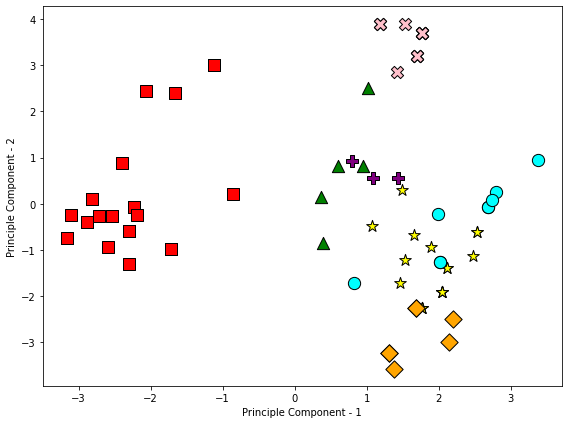

In [ ]:

i=-1
for x,y in zip(PC1, PC2):
  i += 1
  if training_tar_vals[i] == 1 : 
    mark = 's'
    col = 'red'
  elif training_tar_vals[i] == 2 :
    mark = '*'
    col = 'yellow'
  elif training_tar_vals[i] == 3 : 
    mark = '^'
    col = 'green'
  elif training_tar_vals[i] == 4 :
    mark = 'X'
    col = 'pink'
  elif training_tar_vals[i] == 5 : 
    mark = 'P'
    col = 'purple'
  elif training_tar_vals[i] == 6 :
    mark = 'D'
    col = 'orange'
  elif training_tar_vals[i] == 7 :
    mark = 'o'
    col = 'cyan'
  plt.scatter(x, y, c = col, marker = mark, edgecolor="black", s=150)

plt.xlabel("Principle Component - 1")
plt.ylabel("Principle Component - 2")
plt.show()

#@title Visualising training data using 2 most determining dimensions,PC-1 & PC-2

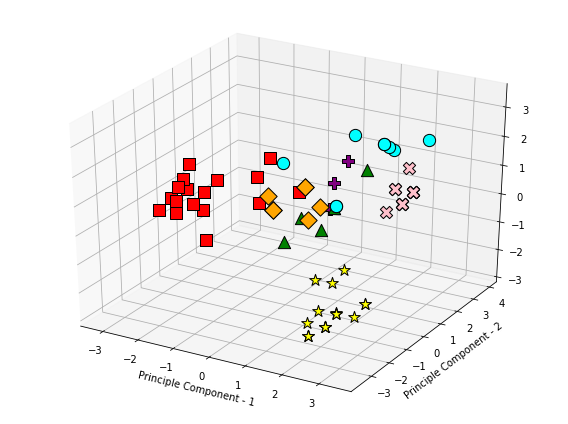

In [ ]:
#@title Visualising training data using 3 most determining dimensions, PC-1, PC-2 and PC-3

i = -1
ax = plt.axes(projection="3d")
for x,y,z in zip(PC1, PC2, PC3):
  i += 1
  if training_tar_vals[i] == 1 : 
    mark = 's'
    col = 'red'
  elif training_tar_vals[i] == 2 :
    mark = '*'
    col = 'yellow'
  elif training_tar_vals[i] == 3 : 
    mark = '^'
    col = 'green'
  elif training_tar_vals[i] == 4 :
    mark = 'X'
    col = 'pink'
  elif training_tar_vals[i] == 5 : 
    mark = 'P'
    col = 'purple'
  elif training_tar_vals[i] == 6 :
    mark = 'D'
    col = 'orange'
  elif training_tar_vals[i] == 7 :
    mark = 'o'
    col = 'cyan'
  ax.scatter3D(x, y, z, c = col, marker = mark, edgecolor="black", s=150)

plt.xlabel("Principle Component - 1")
plt.ylabel("Principle Component - 2")
plt.show()

In [ ]:
def check_accuracy(predicted, actual):
  wrongs = 0
  if np.array_equal(predicted, actual) == False:
    for i in range(0, len(predicted)):
      if predicted[i] != actual[i]:
        wrongs += 1
  return 1-(wrongs/len(predicted))
  
#@title Function for calculating accuracy of classification model

In [ ]:
bayes_predicted = []

model = GaussianNB() 
#training Naive Bayes over avaliable data
model.fit(combineC, np.ravel(training_tar_vals,order='C'))

#testing Naive Bayes Model over test data
for vals in test_df:
  bayes_predicted.append(model.predict([vals]))

print(check_accuracy(np.array(bayes_predicted), np.array(test_tar_vals)))

#@title Naive Bayes Classifier

0.9230769230769231


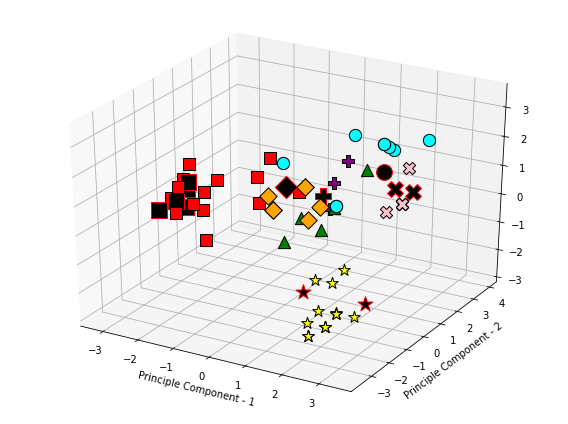

[[4]
 [1]
 [1]
 [6]
 [1]
 [1]
 [5]
 [7]
 [1]
 [1]
 [2]
 [2]
 [4]] [[4]
 [1]
 [1]
 [6]
 [1]
 [1]
 [5]
 [7]
 [1]
 [1]
 [2]
 [2]
 [4]]
1.0


In [ ]:

KNN_predicted = []
model = KNeighborsClassifier(n_neighbors = 3)
#training KNN over avaliable data
model.fit(combineC, np.ravel(training_tar_vals,order='C'))

i = -1

ax = plt.axes(projection="3d")
for x,y,z in zip(PC1, PC2, PC3):
  i += 1
  if training_tar_vals[i] == 1 : 
    mark = 's'
    col = 'red'
  elif training_tar_vals[i] == 2 :
    mark = '*'
    col = 'yellow'
  elif training_tar_vals[i] == 3 : 
    mark = '^'
    col = 'green'
  elif training_tar_vals[i] == 4 :
    mark = 'X'
    col = 'pink'
  elif training_tar_vals[i] == 5 : 
    mark = 'P'
    col = 'purple'
  elif training_tar_vals[i] == 6 :
    mark = 'D'
    col = 'orange'
  elif training_tar_vals[i] == 7 :
    mark = 'o'
    col = 'cyan'
  ax.scatter3D(x, y, z, c = col, marker = mark, edgecolor="black", s=150)


#testing KNN Model over test data
i=-1
for vals in test_df:
  KNN_predicted.append(model.predict([vals]))
  i += 1
  if KNN_predicted[i] == 1 : 
    mark = 's'
  elif KNN_predicted[i] == 2 :
    mark = '*'
  elif KNN_predicted[i] == 3 : 
    mark = '^'
  elif KNN_predicted[i] == 4 :
    mark = 'X'
  elif KNN_predicted[i] == 5 : 
    mark = 'P'
  elif KNN_predicted[i] == 6 :
    mark = 'D'
  elif KNN_predicted[i] == 7 :
    mark = 'o'
  ax.scatter3D(vals[0], vals[1], vals[2], c = 'black', marker = mark, edgecolor="red", s=250)


plt.xlabel("Principle Component - 1")
plt.ylabel("Principle Component - 2")
plt.show()

print(np.array(KNN_predicted), np.array(test_tar_vals))
print(check_accuracy(np.array(KNN_predicted), np.array(test_tar_vals)))

#@title KNN Classifier (with 3D graph of classified test data)

In [ ]:

KNN_predicted = []
model = KNeighborsClassifier(n_neighbors = 3)
#training KNN over avaliable data
model.fit(combineC, np.ravel(training_tar_vals,order='C'))

#testing KNN Model over test data
for vals in test_df:
  KNN_predicted.append(model.predict([vals]))

print(np.array(KNN_predicted), np.array(test_tar_vals))
print(check_accuracy(np.array(KNN_predicted), np.array(test_tar_vals))) 

#@title KNN Classifier (OLD)

[[4]
 [1]
 [1]
 [6]
 [1]
 [1]
 [5]
 [7]
 [1]
 [1]
 [2]
 [2]
 [4]] [[4]
 [1]
 [1]
 [6]
 [1]
 [1]
 [5]
 [7]
 [1]
 [1]
 [2]
 [2]
 [4]]
1.0


1. a Google doc with needed plots, charts, bar graphs, pie charts
 
2. ~~where you collected the dataset~~
(https://archive.ics.uci.edu/ml/datasets.php)
 
3. ~~no of rows and columns present in the dataset~~

(Rows: 101, Columns 18) print dataset
 
4. ~~why we did such preprocessing and what is the change observed in dataset after preprocessing description about the data set,~~

(PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms)


5. ~~why, how and what  ML classification done for ML why specific algorithms / packages were used,~~ 

(Bayes and KNN, using scikitlearn library, [Bayes](https://www.upgrad.com/blog/naive-bayes-classifier/))

6. what is the output, what are you inferences from the output, 
7. what are your questions about the data? what are questions addressed by your analysis